In [2]:
# Importo librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_plataformas = pd.read_csv('plataformas.csv')
df_score = pd.read_csv('scores.csv')

In [7]:
# Uno los dos dataframes vinculando los id
df_final = pd.merge(df_plataformas, df_score, left_on='id', right_on='movieId', how='inner')

In [10]:
df_score.head()

,userId,score,timestamp,movieId
0,1,1.0,2012-10-19,as680
1,1,4.5,2012-10-15,ns2186
2,1,5.0,2012-10-19,hs2381
3,1,5.0,2012-10-15,ns3663
4,1,5.0,2012-10-19,as9500


In [5]:
df_plataformas.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,id,duration_int,duration_type,plataform
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,amazon
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,amazon
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,amazon
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,amazon


In [15]:
df_final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,id,duration_int,duration_type,plataform,userId,score,timestamp,movieId
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,543,5.0,2013-03-23,as1
1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,595,3.0,2005-10-14,as1
2,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,611,3.0,2014-04-21,as1
3,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,2523,3.5,2008-02-06,as1
4,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,amazon,3082,4.0,2008-12-17,as1


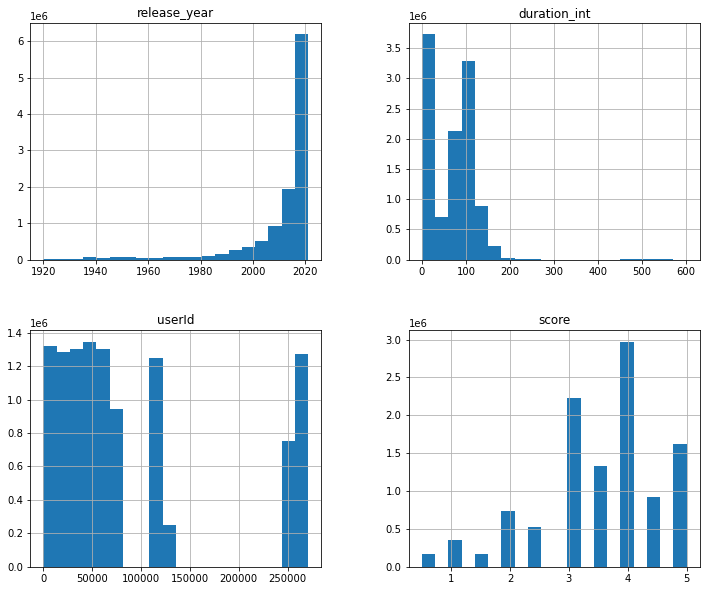

In [24]:
# Realizo una visualización de todas las distribuciones numéricas
df_final.hist(bins=20, figsize=(12,10))
plt.show()
# Podemos ver el crecimiento exponencial de contenido en streaming del 2000 en adelante
# La duración del contenido inusualmente exede las 2 horas

/tmp/ipykernel_28943/2733054591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()
/tmp/ipykernel_28943/2733054591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm')


<AxesSubplot:>

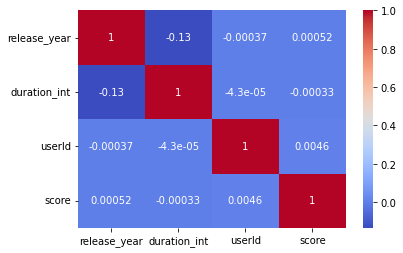

In [18]:
# Busco correlaciones
df_final.corr()
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm')
# Como se puede apreciar en el campo de calor, no existen correlaciones claras entre los campos numéricos

<AxesSubplot:xlabel='release_year'>

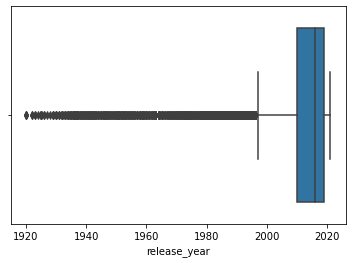

In [5]:
sns.boxplot(x='release_year', data=df_plataformas)
# Acá podemos ver con los outlaiers que la gran mayoría se concentran el año 2000 en adelante

<AxesSubplot:xlabel='score'>

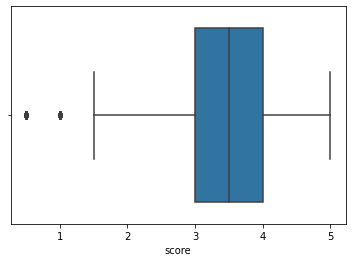

In [6]:
sns.boxplot(x='score', data=df_score)
# La mayoría de los usuarios puntua emtre 3 y 4 estrellas

In [21]:
# Uso value_counts() para contar la frecuencia de cada valor en la columna "Nombre"
value_counts = df_plataformas['listed_in'].value_counts()

# Selecciono los valores de tipo string con más frecuencia
top_values = [value for value in value_counts.index if isinstance(value, str)][:5]

# Imprimimos los valores más repetidos
print(top_values)
print(value_counts)
# Drama, comedia y documentales son los géneros más recurrentes

['drama', 'comedy', 'documentaries', 'comedy, drama', 'drama, suspense']
drama                              1061
comedy                              608
documentaries                       573
comedy, drama                       421
drama, suspense                     399
                                   ... 
comedy, science fiction, sitcom       1
drama, family, international          1
action, adventure, news               1
history                               1
cult movies, dramas, thrillers        1
Name: listed_in, Length: 1687, dtype: int64


In [9]:
# Visualizo la cantidad de datos faltantes
df_final.isnull().sum()

show_id                0
type                   0
title                  0
director         3960615
cast             2550859
country          5510080
date_added       4577546
release_year           0
rating                 0
listed_in              0
description         1815
id                     0
duration_int           0
duration_type     231117
plataform              0
userId                 0
score                  0
timestamp              0
movieId                0
dtype: int64

In [11]:
# Saco un promedio de datos faltantes por cada columna
print(round(df_final.isnull().mean() * 100, 1))

show_id           0.0
type              0.0
title             0.0
director         35.9
cast             23.1
country          50.0
date_added       41.5
release_year      0.0
rating            0.0
listed_in         0.0
description       0.0
id                0.0
duration_int      0.0
duration_type     2.1
plataform         0.0
userId            0.0
score             0.0
timestamp         0.0
movieId           0.0
dtype: float64


In [13]:
# Promedio de datos faltantes en total
print(round(df_final.isnull().mean().mean() * 100, 1), "% Total de datos faltantes")

8.0 % Total de datos faltantes
